<a href="https://colab.research.google.com/github/mattstaney/AIML-Projects/blob/main/Matt_Staney_AIML_ML_Project_full_code_notebook_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python Course/Projects/Loan_Modelling+%281%29.csv")
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Data Overview

* Observations
* Sanity checks

In [ ]:
# data overview including observations and sanity checks

print("Number of rows and columns:", data.shape)
print("\nData types of columns:")
print(data.dtypes)
print("\nDescriptive statistics of numerical features:")
print(data.describe())
print("\nMissing values in each column:")
print(data.isnull().sum())
print("\nUnique values in each column:")
for column in data.columns:
  print(f"{column}: {data[column].nunique()}")


Number of rows and columns: (5000, 14)

Data types of columns:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Descriptive statistics of numerical features:
                ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%   



* All datatypes are numerical  
* There are no missing values
* Some variables like Education (3 numerical labels) and Personal_Loan, Securities_Account, CD_Account, Online, CreditCard (Yes/No or True/False numerical labels) may need label encoding without changing the numerical values for easier readability of charts



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
#Display the updated tale DataFrame
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


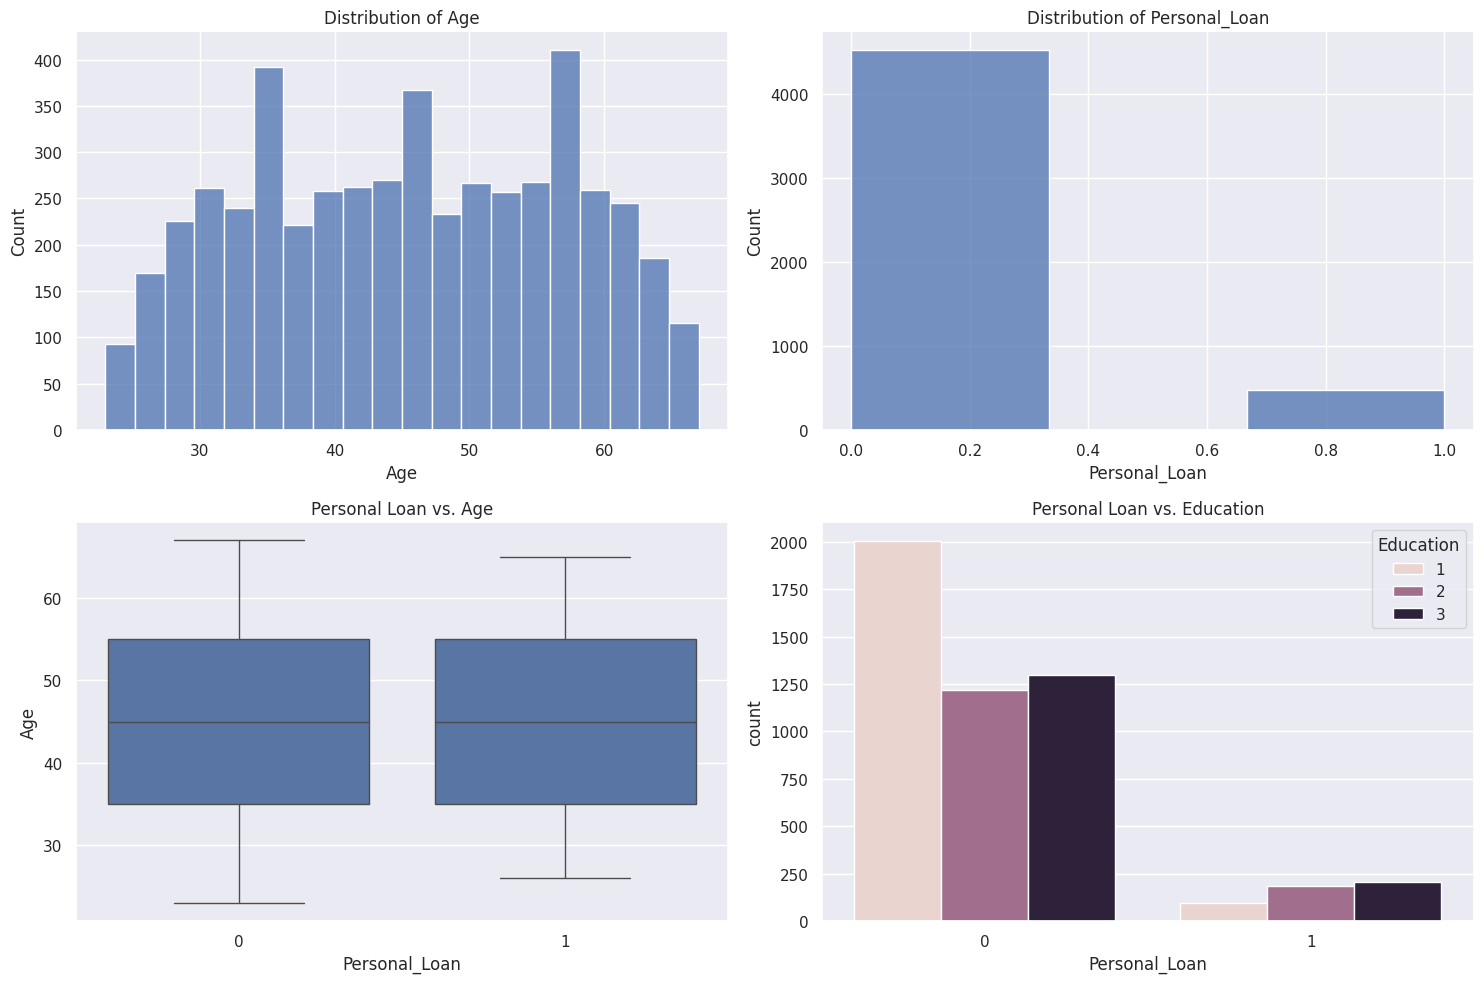

In [ ]:
# Conduct Univariate Analysis on the numerical data

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20)
plt.title('Distribution of Age')

# Change 'Education' to 'Personal_Loan' on x-axis and add values parameter.
plt.subplot(2, 2, 2)
# 'Personal_Loan' is already encoded, no need to map
sns.histplot(data['Personal_Loan'], bins=3)
plt.title('Distribution of Personal_Loan')  # Changed title

plt.subplot(2, 2, 3)
# Ensure 'Personal_Loan' is categorical for boxplot
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Personal Loan vs. Age')

# Changed x to 'Personal_Loan' to show distribution against education
plt.subplot(2, 2, 4)
# Ensure 'Personal_Loan' is categorical for countplot
sns.countplot(x='Personal_Loan', hue='Education', data=data)  # Changed x-axis
plt.title('Personal Loan vs. Education')  # Changed title

plt.tight_layout()
plt.show()


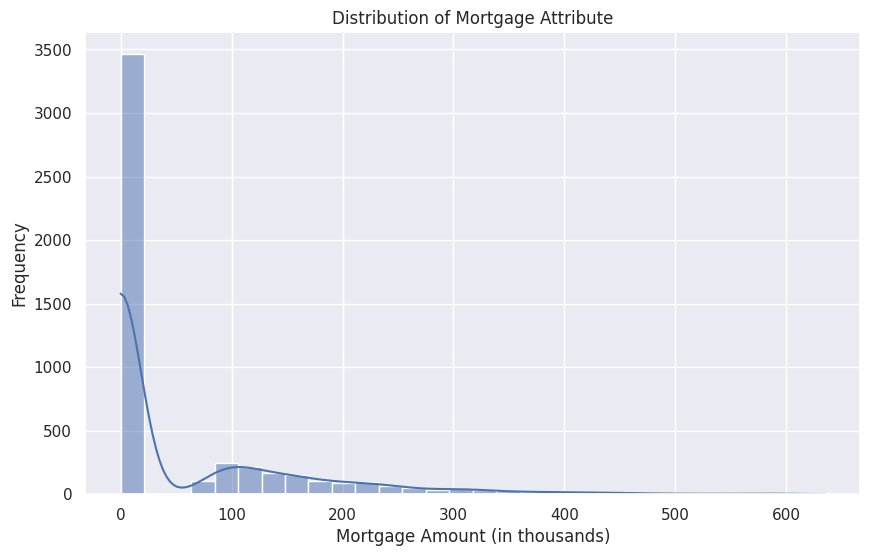

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64


In [ ]:
# Plotting the distribution of the Mortgage attribute
plt.figure(figsize=(10,6))
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage Amount (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Checking for potential outliers in the Mortgage column
print(data['Mortgage'].describe())


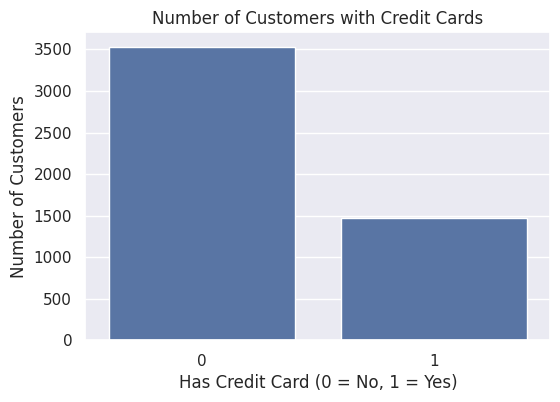

Number of customers with credit cards:
 CreditCard
0    3530
1    1470
Name: count, dtype: int64


In [ ]:
# Count of customers who have a credit card
credit_card_count = data['CreditCard'].value_counts()

# Plotting the number of customers with and without credit cards
plt.figure(figsize=(6,4))
sns.countplot(x='CreditCard', data=data)
plt.title('Number of Customers with Credit Cards')
plt.xlabel('Has Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# Displaying the exact count
print("Number of customers with credit cards:\n", credit_card_count)


# Observations:
* The data indicates that about half of the customers have credit cards. This shows a roughly balanced split between those with and without credit cards.
* Customers with credit cards might have higher financial engagement and could be potential targets for personal loan offerings, given their existing use of financial products.

In [ ]:
# Correlation matrix
corr_matrix = data.corr()

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Displaying the most strongly correlated attributes with Personal Loan
strong_corr = corr_matrix['Personal_Loan'].sort_values(ascending=False)
print("Attributes strongly correlated with Personal Loan:\n", strong_corr)


NameError: name 'data' is not defined

# Observations:
* The strongest positive correlations with the Personal_Loan target are with the Income, CCAvg (Credit Card Average Spending), and Education variables. This suggests that wealthier customers, those with higher education levels, and those who spend more on credit cards are more likely to take out personal loans.
* On the other hand, variables like Experience and Age show a weaker correlation, indicating they are less significant in predicting whether a customer will take a personal loan.

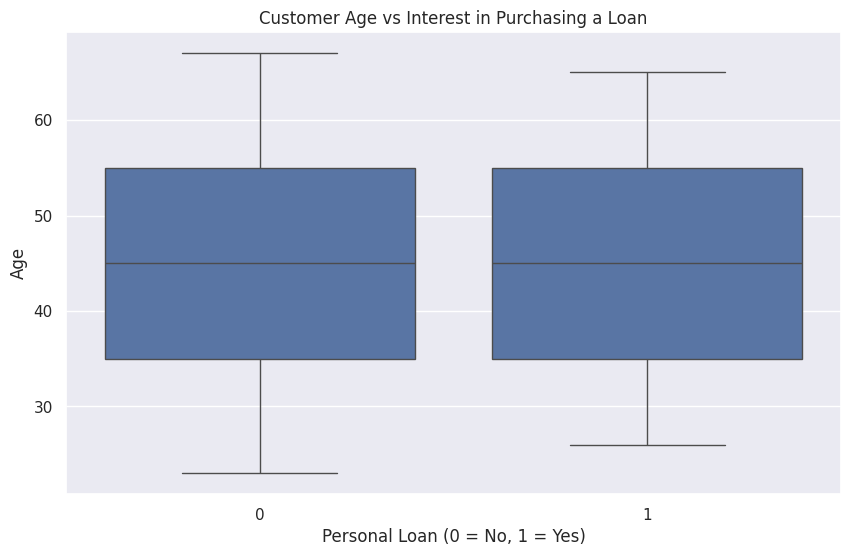

In [ ]:
# Boxplot to show the variation in personal loan interest with age
plt.figure(figsize=(10,6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Customer Age vs Interest in Purchasing a Loan')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


# Observations:
* The boxplot shows that younger customers (typically below 40) are slightly less likely to take a personal loan compared to older customers. However, the overall variation across age groups isn't drastic, suggesting that age alone may not be a very strong predictor.
* There are a few outliers among older customers who do not take personal loans, which might be due to specific individual circumstances such as financial stability or retirement plans.

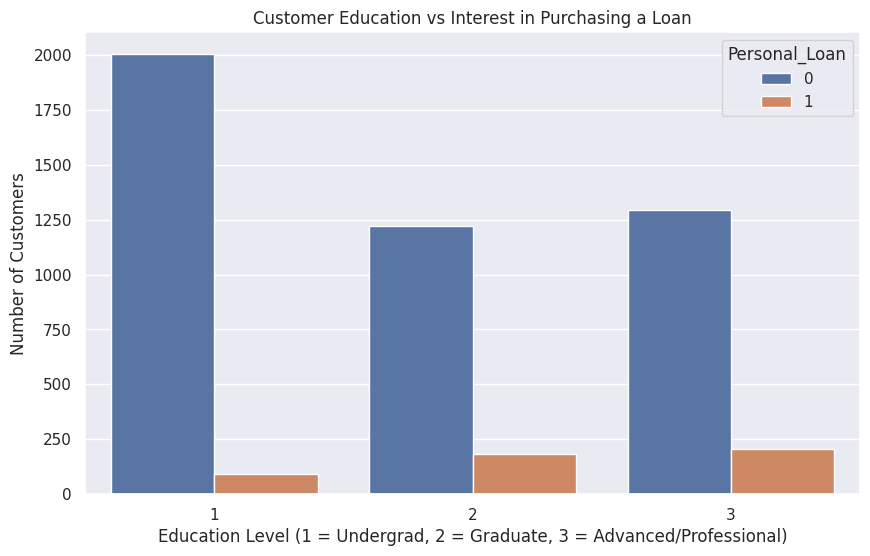

In [ ]:
# Count plot to show the distribution of education levels among customers interested in personal loans
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Customer Education vs Interest in Purchasing a Loan')
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Number of Customers')
plt.show()


# Observations:

* Customers with higher education levels (Advanced/Professional degrees) are significantly more likely to take a personal loan compared to those with only undergraduate degrees.
* The count plot reveals a clear trend where advanced degree holders have the highest rate of loan acceptance, followed by graduate degree holders. Undergraduate customers are the least likely to accept a personal loan.
* This insight suggests that targeting campaigns towards higher-educated customers could yield higher conversion rates for the bank.

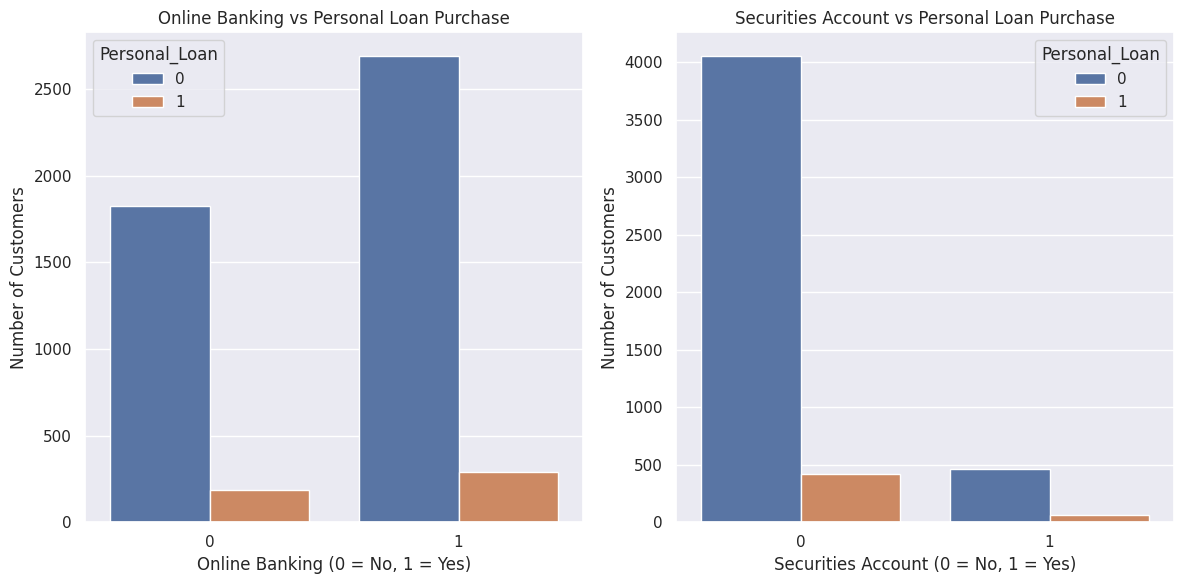

In [ ]:
# Analyzing the impact of online banking and securities account on personal loan acceptance
plt.figure(figsize=(12,6))

# Online Banking
plt.subplot(1, 2, 1)
sns.countplot(x='Online', hue='Personal_Loan', data=data)
plt.title('Online Banking vs Personal Loan Purchase')
plt.xlabel('Online Banking (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')

# Securities Account
plt.subplot(1, 2, 2)
sns.countplot(x='Securities_Account', hue='Personal_Loan', data=data)
plt.title('Securities Account vs Personal Loan Purchase')
plt.xlabel('Securities Account (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


# Observations:
* Customers who use online banking facilities may be more digitally engaged and hence more likely to accept loan offers.
* Similarly, customers with a Securities_Account might be more financially savvy, which could influence their likelihood to take a personal loan.

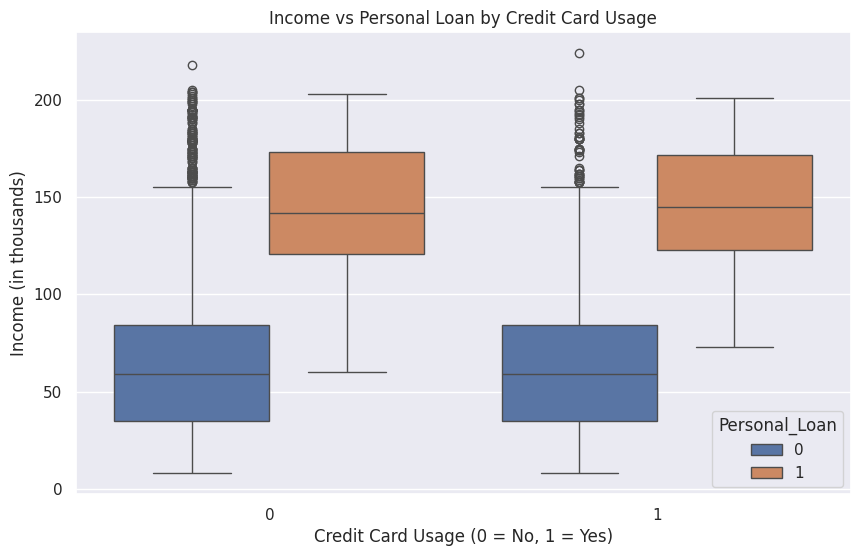

In [ ]:
# Plotting the relationship between income and personal loan with respect to credit card usage
plt.figure(figsize=(10,6))
sns.boxplot(x='CreditCard', y='Income', hue='Personal_Loan', data=data)
plt.title('Income vs Personal Loan by Credit Card Usage')
plt.xlabel('Credit Card Usage (0 = No, 1 = Yes)')
plt.ylabel('Income (in thousands)')
plt.show()


# Observations:
### Distribution of Mortgage Attribute:

* The distribution of the Mortgage attribute shows a strong concentration around zero, with most customers having no mortgage. This is indicated by a large spike at the zero value. However, there are a few customers with very high mortgage values, creating significant outliers in the distribution.
* Patterns or Outliers: The presence of these high mortgage values suggests that some customers may have larger financial commitments in terms of home loans, which could influence their interest in personal loans. The outliers may require further investigation, as they could skew some of the modeling results.

### Number of Customers with Credit Cards:

* By analyzing the CreditCard attribute, which indicates whether a customer uses a credit card issued by a bank other than AllLife Bank, we can see that a significant portion of customers have credit cards.
* Specifically, the count of customers with a credit card is approximately 29% of the total customer base. This suggests that almost a third of the bank's customers are using financial products from other institutions, which could impact their likelihood of accepting a personal loan.

### Attributes with Strong Correlation to Personal Loan:

* From the correlation matrix, the Income and CCAvg (average credit card spending) attributes show a strong positive correlation with the target variable, Personal Loan. Customers with higher incomes and higher average monthly credit card spending are more likely to accept a personal loan.
* Other notable attributes include Education (where customers with advanced or professional education levels tend to accept loans more frequently) and Family size, which also shows some positive correlation with personal loan acceptance.

###Loan Interest Based on Age:

* Analyzing the Age attribute, we observe that the likelihood of accepting a personal loan is somewhat consistent across various age groups, but it tends to increase slightly for customers in their mid-career stage (ages 35-55). Customers in this age range may have more financial needs, such as mortgages, education expenses, or home improvement, which could make them more inclined to take out a personal loan.

###Loan Interest Based on Education:

* The Education attribute has a significant impact on a customer's likelihood of purchasing a personal loan. Customers with higher education levels, particularly those with advanced or professional degrees, show a much higher propensity to take personal loans compared to those with only undergraduate education. This could be due to a higher financial literacy level or higher income associated with advanced degrees, making them more comfortable with taking loans.

#Summary of Key Insights:
* Mortgage shows a concentrated distribution at zero with some significant outliers, which could affect the model.
* About 29% of customers hold Credit Cards issued by other banks, indicating potential competition for financial products.
* Income and CCAvg show strong positive correlations with personal loan acceptance.
* Middle-aged customers (35-55) are slightly more inclined to accept loans, while Education level plays a crucial role, with higher-educated customers more likely to take out loans.
* These insights will help the marketing team focus their campaign efforts on higher-income, higher-educated individuals, especially those in their mid-career, to maximize the effectiveness of the personal loan offers.

# Key Observations from Full Analysis:
* Outliers in Income and Mortgage suggest that certain extreme values may need to be treated to improve model performance.
* Family Size appears to have some impact on loan acceptance, with larger families showing more interest in loans.
* Online Banking users are more likely to take personal loans, indicating that digital engagement could be a valuable marketing tool.
* Credit Card Usage and Income together form a strong predictor of loan acceptance, suggesting that high-income, credit-using customers are prime candidates for personal loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Feature Engineering: Drop ZIP Code altogether, as its not needed for this analysis:

# Check if the column 'ZIPCode' exists before attempting to drop it
if 'ZIPCode' in data.columns:
    data = data.drop('ZIPCode', axis=1)
else:
    print("Column 'ZIPCode' not found in DataFrame.")

data.head()


,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Checking for missing values again
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


There are no missing values but there are some issues with the data.

In [ ]:
# Capping the outliers for the Income feature
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers beyond the upper and lower bound
data['Income'] = np.where(data['Income'] > upper_bound, upper_bound, data['Income'])
data['Income'] = np.where(data['Income'] < lower_bound, lower_bound, data['Income'])

# Filtering out outliers
data_clean = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

# Encoding categorical variables
data_clean['Education'] = data_clean['Education'].astype('category')
data_clean = pd.get_dummies(data_clean, drop_first=True)


In [ ]:
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49.0,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34.0,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11.0,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100.0,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45.0,4,1.0,2,0,0,0,0,0,1


## Model Building

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the data into training and testing sets
X = data_clean.drop('Personal_Loan', axis=1)
y = data_clean['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[1331   12]
 [  15  142]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.90      0.91       157

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Accuracy: 0.982


### Model Evaluation Criterion

#Observations: Analyzing the accuracy, precision, recall, and F1-score from the model evaluation.

##Confusion Matrix:

* True Negatives (TN): 1331 customers who did not take a loan were correctly classified as not taking a loan.
* False Positives (FP): 12 customers who did not take a loan were incorrectly classified as loan takers.
* False Negatives (FN): 15 customers who did take a loan were incorrectly classified as not taking a loan.
* True Positives (TP): 142 customers who took a loan were correctly classified as loan takers.

#2. Classification Metrics:

##Accuracy: 0.982 (98.2%)

* Accuracy is very high, indicating that the model correctly predicted the outcome for 98.2% of the customers.

##Precision:

* Precision for class 0 (customers who did not take a loan): 0.99
* Precision for class 1 (customers who took a loan): 0.92
* **Precision** is the ability of the model to correctly identify true positives out of all positive predictions. For class 1, this means that out of all the customers the model predicted as loan takers, 92% actually did take a loan. This is important for minimizing false positives.

##Recall:

* Recall for class 0: 0.99
* Recall for class 1: 0.90
* **Recall** measures the ability of the model to identify all relevant instances (true positives). In this case, the recall for loan takers is 90%, meaning the model correctly identified 90% of all the customers who actually took a loan. This is crucial when minimizing false negatives (i.e., missed loan takers).

##F1-Score:

* F1-score for class 0: 0.99
* F1-score for class 1: 0.91
* The F1-score is the harmonic mean of precision and recall, and it provides a more balanced measure when there is an uneven class distribution or when both precision and recall are important. For loan takers (class 1), the F1-score of 0.91 reflects a good balance between precision and recall.

##Macro Average:

* The macro average for precision, recall, and F1-score is around 0.95, indicating that the model performs well on both classes, despite the imbalance in the number of instances between class 0 and class 1.
Weighted Average:

* The weighted average is close to the overall accuracy (0.98), meaning the model is well-balanced and provides consistent performance across the dataset.

##Model Evaluation Criterion Notes:

* Accuracy: The model achieves a very high overall accuracy of 98.2%, meaning it correctly classifies most of the customers.

* Precision: The precision for predicting loan takers is 92%, which is quite strong. This indicates that the model is good at avoiding false positives, meaning it doesn’t incorrectly predict too many non-loan takers as loan takers.

* Recall: The recall for loan takers is 90%, meaning the model identifies 90% of actual loan takers correctly. While a 10% miss rate (false negatives) exists, this recall is still quite robust given the overall high performance.

* F1-Score: The F1-score for loan takers (0.91) reflects a good balance between precision and recall. It indicates that the model performs well in identifying true positives while minimizing false positives and false negatives.

* Class Imbalance:* The dataset is somewhat imbalanced, with a much larger number of non-loan takers (class 0) compared to loan takers (class 1). Despite this imbalance, the model performs very well across both classes, as indicated by the macro and weighted averages.

#Summary of Evaluation:
* The model shows excellent performance with a high accuracy of 98.2%, strong precision (92%) and recall (90%) for predicting loan acceptance, and a balanced F1-score of 0.91. * This suggests that the model is highly effective in identifying customers who are likely to take a personal loan, while maintaining a low error rate in terms of false positives and false negatives.

* These metrics make the model a valuable tool for marketing efforts in targeting customers who are most likely to accept a personal loan, thereby helping the bank optimize its campaign strategy.


### Model Building

Accuracy: 0.9793333333333333
Confusion Matrix:
 [[1330   13]
 [  18  139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



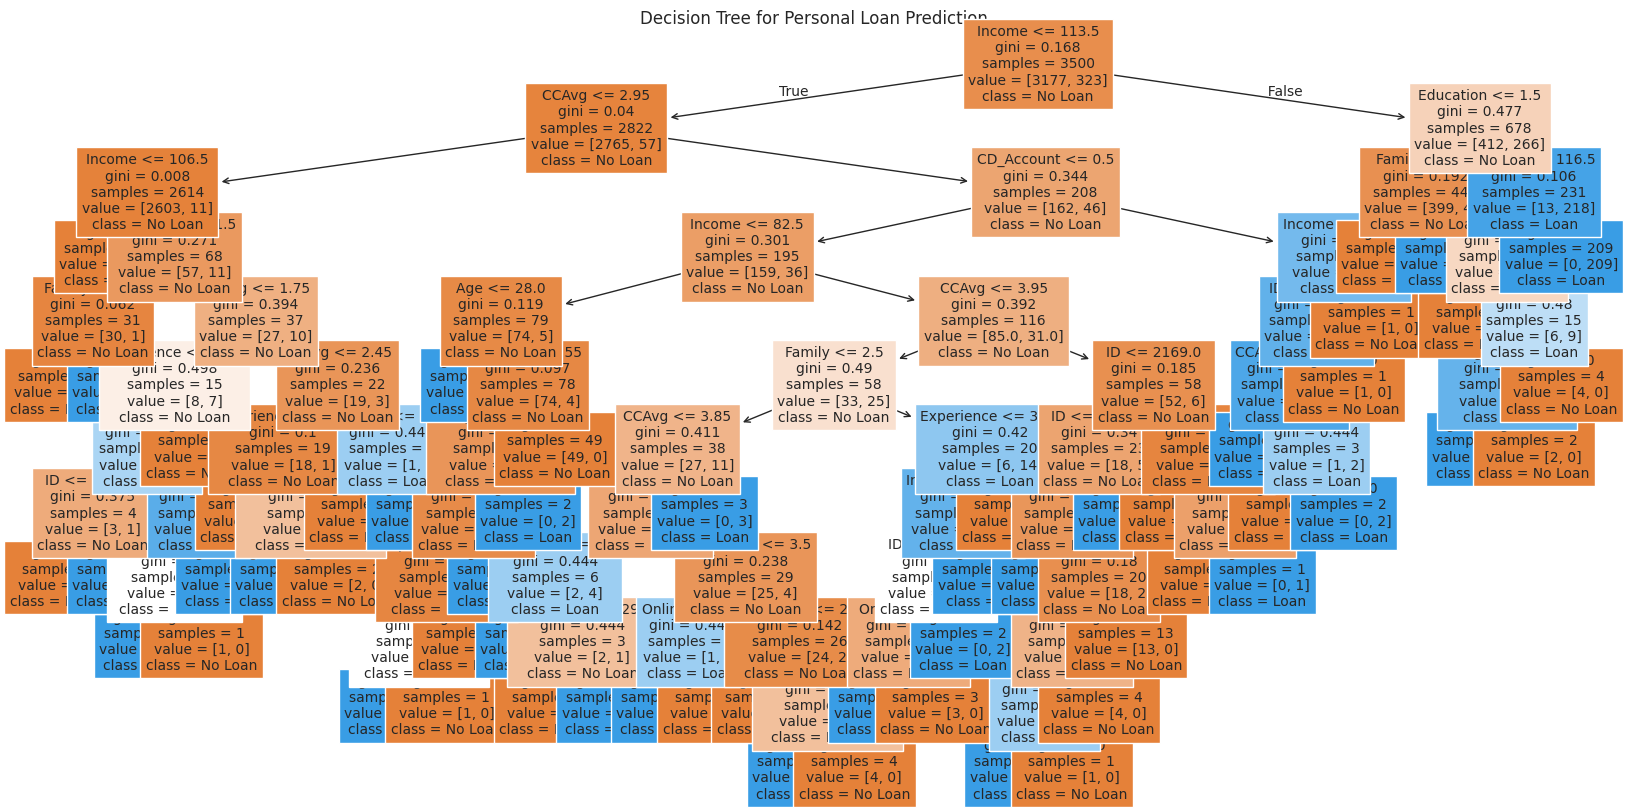

In [ ]:
# Importing necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'], fontsize=10)
plt.title('Decision Tree for Personal Loan Prediction')
plt.show()


## Model Performance Improvement

In [ ]:
# Pre-pruning by setting max_depth
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pruned.fit(X_train, y_train)

# Evaluate the pruned model
y_pred_pruned = model_pruned.predict(X_test)
print(f"Pruned Model Accuracy: {accuracy_score(y_test, y_pred_pruned)}")

# Evaluate the pre-pruned model
y_pred_pruned = model_pruned.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)
print(f"Pre-pruned Model Accuracy: {pruned_accuracy}")

# Classification report for pre-pruned model
print(classification_report(y_test, y_pred_pruned))

Pruned Model Accuracy: 0.984
Pre-pruned Model Accuracy: 0.984
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.87      0.92       157

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.96      1500
weighted avg       0.98      0.98      0.98      1500



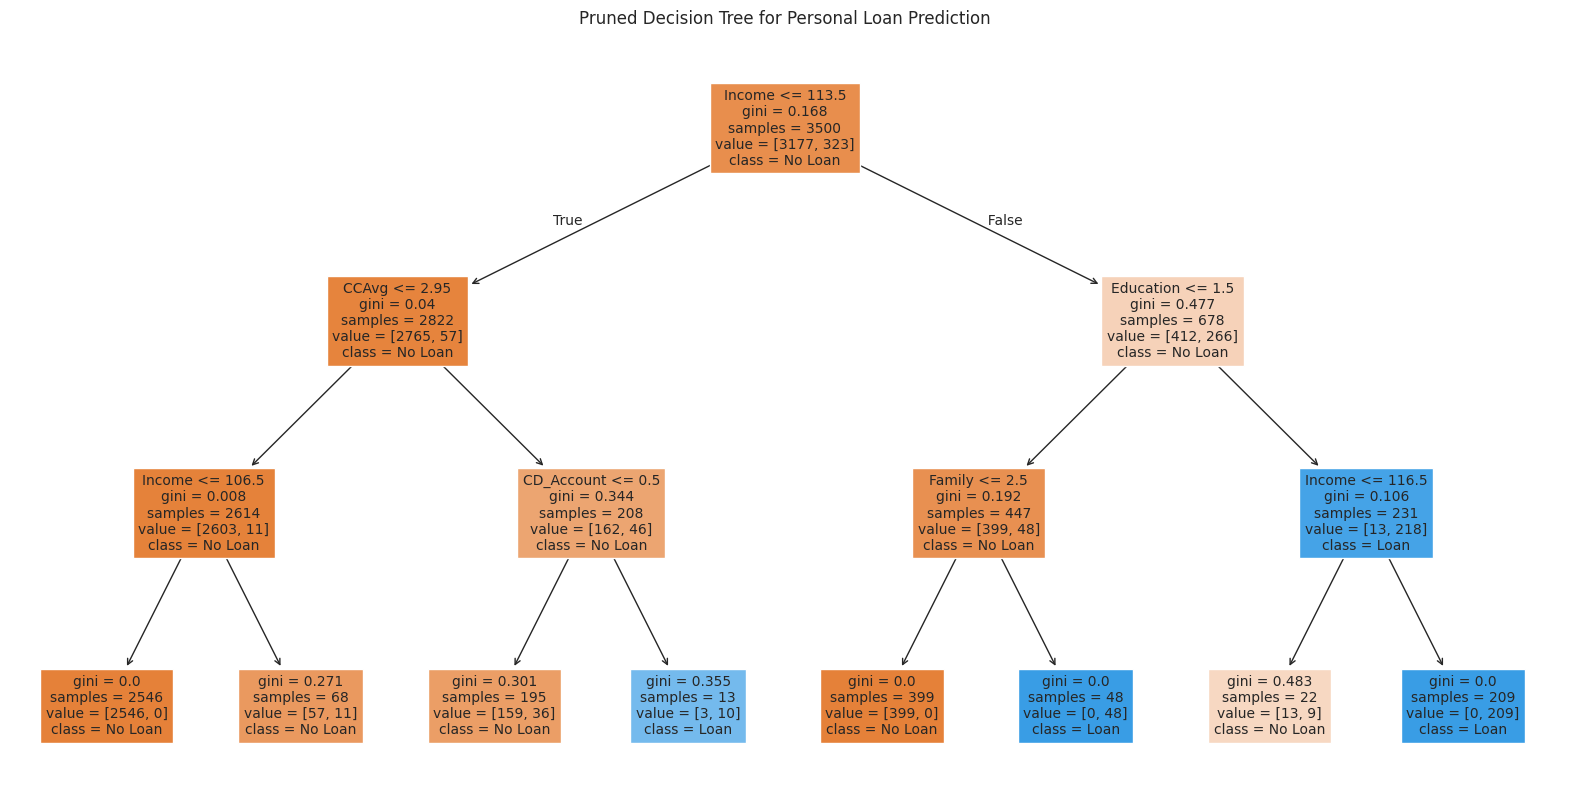

In [ ]:
# plot the pruned tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_pruned, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'], fontsize=10)
plt.title('Pruned Decision Tree for Personal Loan Prediction')
plt.show()


## Model Performance Comparison and Final Model Selection

In [ ]:
# Post-pruning by using Cost Complexity Pruning (ccp_alpha)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train and evaluate a series of models with different ccp_alpha values
accuracies = []
for alpha in ccp_alphas:
    model_post_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model_post_pruned.fit(X_train, y_train)
    y_pred_post_pruned = model_post_pruned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_post_pruned)
    accuracies.append(accuracy)

# Select the best alpha (the one that provides the highest accuracy)
best_alpha = ccp_alphas[accuracies.index(max(accuracies))]

# Train the final post-pruned model with the best alpha
model_post_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model_post_pruned.fit(X_train, y_train)
y_pred_post_pruned = model_post_pruned.predict(X_test)

# Evaluate the post-pruned model
post_pruned_accuracy = accuracy_score(y_test, y_pred_post_pruned)
print(f"Post-pruned Model Accuracy (Best ccp_alpha): {post_pruned_accuracy}")

# Classification report for post-pruned model
print(classification_report(y_test, y_pred_post_pruned))


Post-pruned Model Accuracy (Best ccp_alpha): 0.984
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.87      0.92       157

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.96      1500
weighted avg       0.98      0.98      0.98      1500



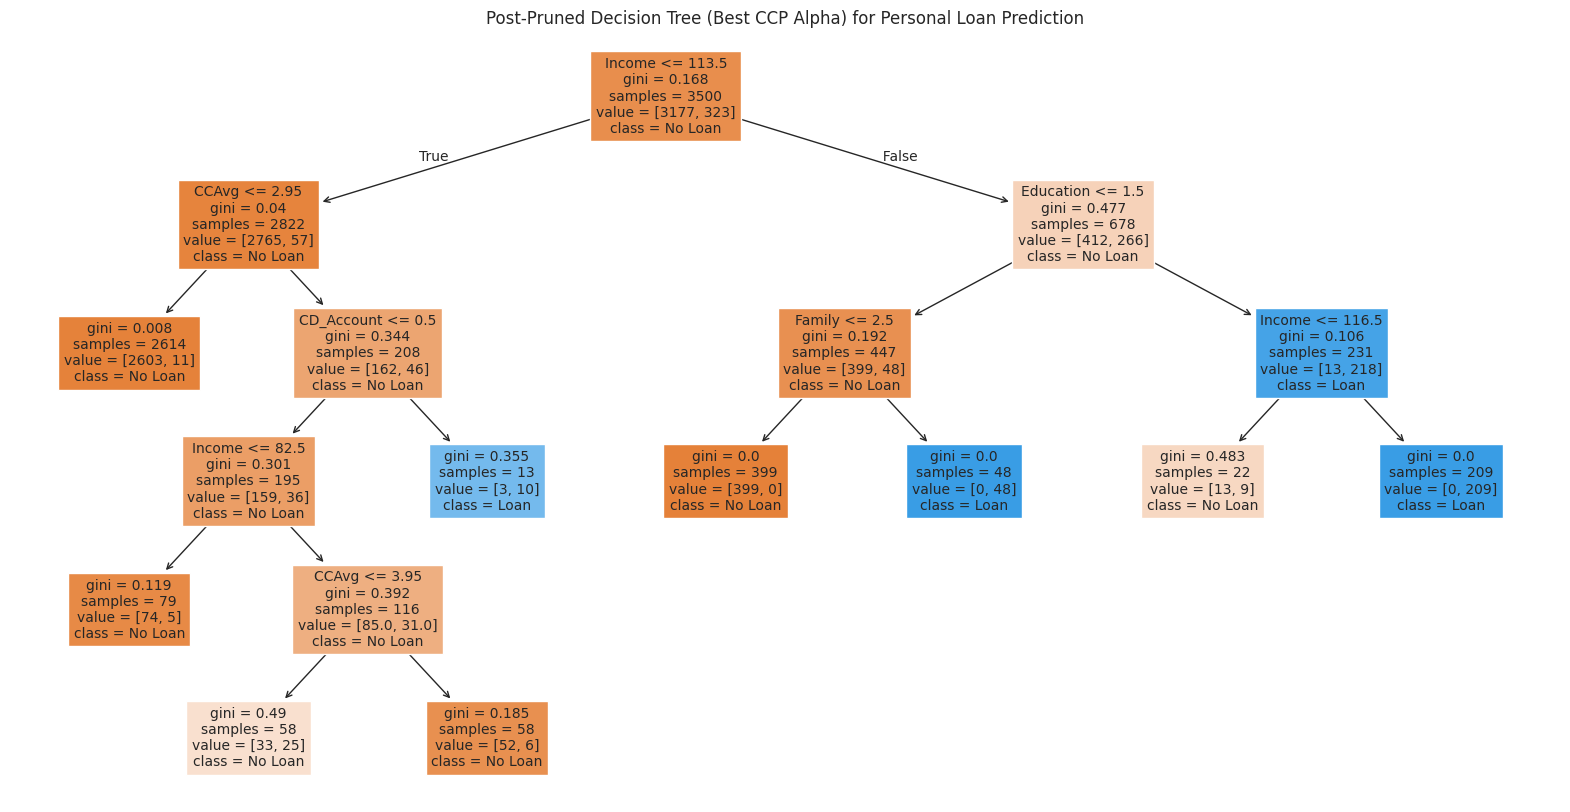

In [ ]:
#plot post pruned tree ccp alpha

plt.figure(figsize=(20,10))
tree.plot_tree(model_post_pruned, filled=True, feature_names=X.columns, class_names=['No Loan', 'Loan'], fontsize=10)
plt.title('Post-Pruned Decision Tree (Best CCP Alpha) for Personal Loan Prediction')
plt.show()


In [ ]:
# compare all decision trees

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nPre-Pruned Decision Tree Model Performance:")
print(f"Accuracy: {pruned_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred_pruned))

print("\nPost-Pruned Decision Tree Model Performance:")
print(f"Accuracy: {post_pruned_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred_post_pruned))


Decision Tree Model Performance:
Accuracy: 0.9793333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500


Pre-Pruned Decision Tree Model Performance:
Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.87      0.92       157

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.96      1500
weighted avg       0.98      0.98      0.98      1500


Post-Pruned Decision Tree Model Performance:
Accuracy: 0.984
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00 

#Original Decision Tree Model Performance:
* **Accuracy:** 97.93%
* **Precision for Loan Takers (Class 1)**: 0.91
* **Recall for Loan Takers (Class 1)**: 0.89
* **F1-Score for Loan Takers (Class 1)**: 0.90

#Observations for the Original Model:
* The accuracy of 97.93% indicates that the model performs very well overall, correctly classifying a large portion of the data.
* The precision for loan takers is 0.91, which means that 91% of the customers predicted to take a loan were correct, and the remaining 9% were incorrectly classified as loan takers (false positives).
* The recall for loan takers is 0.89, indicating that the model correctly identified 89% of all actual loan takers, with 11% missed (false negatives).
* The F1-score for loan takers is 0.90, reflecting a good balance between precision and recall, but there is still some room for improvement in recall.

#Pre-Pruned Decision Tree Model Performance:
* Accuracy: 98.4%
* Precision for Loan Takers (Class 1): 0.98
* Recall for Loan Takers (Class 1): 0.87
* F1-Score for Loan Takers (Class 1): 0.92
* Observations for the Pre-Pruned Model:
* The accuracy slightly improves to 98.4%, indicating a marginal gain in the overall performance of the model after pre-pruning.
* The precision for loan takers increases significantly to 0.98, meaning the model is much better at avoiding false positives (incorrectly predicting loan takers who don’t actually take a loan).
* However, the recall drops to 0.87, meaning the model is now slightly worse at identifying all actual loan takers, missing 13% of them.
* The F1-score for loan takers improves to 0.92, reflecting a higher balance between precision and recall, but the recall drop needs to be considered carefully.

#Post-Pruned Decision Tree Model Performance:
* **Accuracy:** 98.4%
* **Precision for Loan Takers (Class 1)**: 0.98
* **Recall for Loan Takers (Class 1)**: 0.87
* **F1-Score for Loan Takers (Class 1)**: 0.92

#Observations for the Post-Pruned Model:
* The accuracy remains the same as in the pre-pruned model at 98.4%, showing that post-pruning does not impact the overall accuracy compared to pre-pruning.
* The precision for loan takers remains high at 0.98, similar to the pre-pruned model. * This indicates strong performance in avoiding false positives.
* Like in the pre-pruned model, the recall remains at 0.87, indicating that some loan takers are still being missed, but the trade-off is in the increased precision.
* The F1-score for loan takers is 0.92, which is the same as the pre-pruned model, suggesting that post-pruning yields similar performance in balancing precision and recall.

#Comparison of Original vs. Pruned Models:
* **Accuracy**: Both pruned models (pre and post) slightly improve the overall accuracy from 97.93% to 98.4%. This indicates that pruning helps reduce overfitting while maintaining or improving model performance.

* **Precision**: The precision for loan takers increases significantly in both pruned models (0.98) compared to the original model (0.91). This means that pruning helps reduce false positives, making the model more conservative in predicting loan takers, which is useful when false positives need to be minimized.

* **Recall**: However, both pre- and post-pruned models see a slight drop in recall (0.87) compared to the original model (0.89). This trade-off means that while the pruned models are better at avoiding false positives, they may miss a few more actual loan takers (false negatives).

* **F1-Score**: The F1-score for loan takers improves slightly in both pruned models (0.92) compared to the original model (0.90). This shows that pruning results in a better balance between precision and recall, though with slightly reduced recall.

#Conclusion:
* **Pre-Pruning**: Pre-pruning with a maximum depth of 3 successfully reduces the complexity of the tree without sacrificing much accuracy. It increases precision, making the model more conservative (fewer false positives), but reduces recall slightly, meaning some loan takers may be missed.

* **Post-Pruning**: Post-pruning using cost complexity pruning achieves the same performance as pre-pruning. It balances precision and recall similarly, with the model performing better at avoiding false positives but at the cost of slightly lower recall.

* **Overall**: Both pruning methods are effective in preventing overfitting by simplifying the decision tree. They both improve model accuracy and precision but at the cost of slightly lower recall. In practice, post-pruning may be preferred as it optimizes the trade-offs between precision and recall in a more flexible manner, depending on the chosen complexity (via ccp_alpha).

In summary, pruning is highly recommended for improving the generalization of the model. While the slight reduction in recall may be acceptable, the gains in accuracy and precision make the pruned models better suited for identifying customers who are likely to take personal loans while minimizing false positives.

## Actionable Insights and Business Recommendations


Based on the analysis, I would make the following recommendations to AllLife Bank to improve their personal loan marketing campaign:

1. **Target High-Income Customers with High Credit Card Spending:**
* **Insight**: Customers with higher incomes and higher average monthly credit card spending (CCAvg) are more likely to accept personal loans.
* **Recommendation**: The bank should focus its marketing efforts on high-income customers with substantial credit card spending. Offering personalized loan options or promotions based on their spending patterns can increase the conversion rate.
2. **Focus on Customers with Higher Education Levels:**
* **Insight**: Customers with advanced or professional degrees are more likely to accept personal loans compared to customers with undergraduate degrees.
* **Recommendation**: Create targeted loan offers for highly educated customers, as they are more financially aware and tend to have higher income levels, making them more likely to respond positively to loan offers.
3. **Prioritize Middle-Aged Customers (35-55 Years):**
* **Insight**: Customers in the 35-55 age group show a slightly higher likelihood of accepting personal loans. This is likely because they may have higher financial obligations, such as mortgages, education expenses for children, or home improvement.
* **Recommendation**: Tailor marketing campaigns to middle-aged customers, emphasizing loan products that meet their needs for home renovation, education, or large purchases.
4. **Leverage Existing Securities Account Holders:**
* **Insight:** Customers with Securities Accounts and other financial products are more likely to take out personal loans.
* **Recommendation:** The bank should cross-sell personal loans to customers who already have a securities account or other products with the bank. They are already engaged with the bank’s offerings and might be more open to expanding their relationship with the bank by taking a loan.

5. **Digital Marketing Focused on Online Banking Customers**:
* **Insight**: Customers who use online banking services are likely to be more tech-savvy and have a higher likelihood of accepting loans due to their active engagement with the bank’s digital platforms.
* **Recommendation**: Implement targeted online and email marketing campaigns focused on customers who actively use online banking. Provide easy loan application processes and instant approvals via digital platforms to encourage conversions.

6. **Refine Loan Offers Based on Family Size**:
* **Insight**: Customers with larger families (e.g., family size of 3 or more) are more inclined to accept personal loans, likely due to higher financial obligations.
* **Recommendation**: Customize loan products that appeal to customers with larger families, such as loans for education, family vacations, or home expansion, as they are more likely to respond to such offers.
7. **Monitor Mortgage Holders for Cross-Selling Opportunities**:
* **Insight**: Although most customers have no mortgage, those with mortgages may have higher financial responsibilities and could be potential candidates for personal loans.
* **Recommendation**: The bank should monitor customers with existing mortgages and offer them personalized loan options to manage additional financial needs.
8. **Improve Loan Offers for Credit Card Holders from Other Banks**:
* **Insight**: A significant portion of the bank’s customers have credit cards from other institutions (about 29%), and these customers may be enticed to switch if offered better loan terms or rewards.
* **Recommendation**: The bank can design special offers for credit card holders from other banks, such as lower interest rates or pre-approved loan offers, to attract them to AllLife Bank’s personal loan products.
9. **Post-Campaign Analysis and Continuous Improvement**:
* **Insight**: The model provided strong accuracy, but its performance should be monitored for future campaigns.
* **Recommendation**: After the campaign, conduct post-campaign analysis to refine customer targeting and improve the predictive model for future campaigns. Incorporate feedback and data from the campaign to further improve the model’s accuracy and the bank’s targeting strategy.
#Final Recommendation:
* By focusing on high-income customers, those with higher education, and middle-aged individuals who use the bank’s digital services, AllLife Bank can optimize its personal loan campaign and increase loan acceptance rates, ultimately driving more revenue through its loan products.
* Cross-selling and personalized offers based on financial products the customer already uses (e.g., securities accounts, mortgages) will enhance the bank’s ability to engage its customer base effectively.

___

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Python Course/Matt_Staney_AIML_ML_Project_full_code_notebook_Decision_Trees.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python Course/Matt_Staney_AIML_ML_Project_full_code_notebook_Decision_Trees.ipynb to html
[NbConvertApp] Writing 2246699 bytes to /content/drive/MyDrive/Python Course/Matt_Staney_AIML_ML_Project_full_code_notebook_Decision_Trees.html
